In [59]:

import gym
import random
import numpy as np
from helpers import generate_action
from procgen import ProcgenGym3Env
import imageio
import matplotlib.pyplot as plt

In [60]:


# Constants
COLORS = ["blue", "green", "red"]  # Assuming 3 colors: blue, green, red
KEY = 2
LOCKED_DOOR = 1
WORLD_DIM = 25

MAZE_STATE_DICT_TEMPLATE = [
    ["int", "SERIALIZE_VERSION"],
    ["string", "game_name"],
    ["int", "options.paint_vel_info"],
    ["int", "options.use_generated_assets"],
    ["int", "options.use_monochrome_assets"],
    ["int", "options.restrict_themes"],
    ["int", "options.use_backgrounds"],
    ["int", "options.center_agent"],
    ["int", "options.debug_mode"],
    ["int", "options.distribution_mode"],
    ["int", "options.use_sequential_levels"],
    ["int", "options.use_easy_jump"],
    ["int", "options.plain_assets"],
    ["int", "options.physics_mode"],
    ["int", "grid_step"],
    ["int", "level_seed_low"],
    ["int", "level_seed_high"],
    ["int", "game_type"],
    ["int", "game_n"],
    # level_seed_rand_gen.serialize(b'],
    ["int", "level_seed_rand_gen.is_seeded"],
    ["string", "level_seed_rand_gen.str"],
    # end level_seed_rand_gen.serialize(b'],
    # rand_gen.serialize(b'],
    ["int", "rand_gen.is_seeded"],
    ["string", "rand_gen.str"],
    # end rand_gen.serialize(b'],
    ["float", "step_data.reward"],
    ["int", "step_data.done"],
    ["int", "step_data.level_complete"],
    ["int", "action"],
    ["int", "timeout"],
    ["int", "current_level_seed"],
    ["int", "prev_level_seed"],
    ["int", "episodes_remaining"],
    ["int", "episode_done"],
    ["int", "last_reward_timer"],
    ["float", "last_reward"],
    ["int", "default_action"],
    ["int", "fixed_asset_seed"],
    ["int", "cur_time"],
    ["int", "is_waiting_for_step"],
    # end Game::serialize(b'],
    ["int", "grid_size"],
    # write_entities(b, entities'],
    ["int", "ents.size"],
    # for (size_t i = 0; i < ents.size(', i++)
    [
        "loop",
        "ents",
        "ents.size",
        [
            # ents[i]->serialize(b'],
            ["float", "x"],
            ["float", "y"],
            ["float", "vx"],
            ["float", "vy"],
            ["float", "rx"],
            ["float", "ry"],
            ["int", "type"],
            ["int", "image_type"],
            ["int", "image_theme"],
            ["int", "render_z"],
            ["int", "will_erase"],
            ["int", "collides_with_entities"],
            ["float", "collision_margin"],
            ["float", "rotation"],
            ["float", "vrot"],
            ["int", "is_reflected"],
            ["int", "fire_time"],
            ["int", "spawn_time"],
            ["int", "life_time"],
            ["int", "expire_time"],
            ["int", "use_abs_coords"],
            ["float", "friction"],
            ["int", "smart_step"],
            ["int", "avoids_collisions"],
            ["int", "auto_erase"],
            ["float", "alpha"],
            ["float", "health"],
            ["float", "theta"],
            ["float", "grow_rate"],
            ["float", "alpha_decay"],
            [
                "float",
                "climber_spawn_x",
            ],
        ],
    ],
    # end ents[i]->serialize(b'],
    # end write_entities
    ["int", "use_procgen_background"],
    ["int", "background_index"],
    ["float", "bg_tile_ratio"],
    ["float", "bg_pct_x"],
    ["float", "char_dim"],
    ["int", "last_move_action"],
    ["int", "move_action"],
    ["int", "special_action"],
    ["float", "mixrate"],
    ["float", "maxspeed"],
    ["float", "max_jump"],
    ["float", "action_vx"],
    ["float", "action_vy"],
    ["float", "action_vrot"],
    ["float", "center_x"],
    ["float", "center_y"],
    ["int", "random_agent_start"],
    ["int", "has_useful_vel_info"],
    ["int", "step_rand_int"],
    # asset_rand_gen.serialize(b'],
    ["int", "asset_rand_gen.is_seeded"],
    ["string", "asset_rand_gen.str"],
    # end asset_rand_gen.serialize(b'],
    ["int", "main_width"],
    ["int", "main_height"],
    ["int", "out_of_bounds_object"],
    ["float", "unit"],
    ["float", "view_dim"],
    ["float", "x_off"],
    ["float", "y_off"],
    ["float", "visibility"],
    ["float", "min_visibility"],
    # grid.serialize(b'],
    ["int", "w"],
    ["int", "h"],
    # b->write_vector_int(data'],
    ["int", "data.size"],
    # for (auto i : v) {
    ["loop", "data", "data.size", [["int", "i"]]],
    # end b->write_vector_int(data'],
    # end grid.serialize(b'],
    # end BasicAbstractGame::serialize(b'],
    ["int", "maze_dim"],
    ["int", "world_dim"],
    ["int", "END_OF_BUFFER"],
]

class StateValue:
    def __init__(self, val, idx):
        self.val = val
        self.idx = idx

class EnvState:
    def __init__(self, state_bytes):
        self.state_bytes = state_bytes
        self.state_vals = self._parse_state_bytes(state_bytes)

    def _parse_state_bytes(self, state_bytes):
        state_vals = {}

        num_keys = int.from_bytes(state_bytes[:4], byteorder="little")
        state_vals["num_keys"] = num_keys

        # Extract the world dimension
        world_dim = int.from_bytes(state_bytes[4:8], byteorder="little")
        state_vals["world_dim"] = world_dim

        # Extract the color order
        color_order = []
        for i in range(num_keys):
            color_idx = state_bytes[8 + i]
            color = COLORS[color_idx]
            color_order.append(StateValue(color, i))
        state_vals["color_order"] = color_order

        # Extract the grid size
        grid_size = int.from_bytes(state_bytes[8 + num_keys : 12 + num_keys], byteorder="little")
        state_vals["grid_size"] = grid_size

        # Extract the grid data
        grid_data = []
        for i in range(grid_size * grid_size):
            val = int.from_bytes(state_bytes[12 + num_keys + i : 13 + num_keys + i], byteorder="little")
            grid_data.append(StateValue(val, i))
        state_vals["grid_data"] = grid_data

        return state_vals

    def _serialize_state(self, state_vals):
        # Implement the logic to serialize the state values into bytes
        # ...
        return b""

    def get_color_order(self):
        """Get the color order from the game state."""
        color_order = self.state_vals["color_order"]
        return [color.val for color in color_order]

    def set_color_order(self, color_order):
        """Set the color order in the game state."""
        state_vals = self.state_vals
        state_vals["color_order"] = [StateValue(color, 0) for color in color_order]
        self.state_bytes = self._serialize_state(state_vals)

    def randomly_order_colors(self):
        """Randomly order the colors in the game state."""
        color_order = COLORS.copy()
        random.shuffle(color_order)
        self.set_color_order(color_order)

    def get_objects(self):
        # Implement the logic to retrieve the objects from the game state
        # and return them as a list of dictionaries
        # ...
        return []

def game_reset(env):
    # Reset the game environment
    # ...

    # Randomly order the colors
    state = EnvState(env.env.callmethod("get_state")[0])
    state.randomly_order_colors()
    env.env.callmethod("set_state", [state.state_bytes])

    # ...

def asset_for_type(state, obj_type, obj_theme):
    if obj_type == KEY:
        color_order = state.get_color_order()
        color = color_order[obj_theme]
        return f"misc_assets/key{color.capitalize()}.png"
    elif obj_type == LOCKED_DOOR:
        color_order = state.get_color_order()
        color = color_order[obj_theme]
        return f"misc_assets/lock_{color}.png"
    # ... (code for other object types) ...

def render_game_frame(state):
    frame = np.zeros((WORLD_DIM, WORLD_DIM, 3), dtype=np.uint8)

    for obj in state.get_objects():
        obj_type = obj["type"]
        obj_theme = obj["image_theme"]
        asset = asset_for_type(state, obj_type, obj_theme)

        # Load the asset image and draw it on the frame
        # ...

    return frame

def create_venv(num=1, start_level=100, num_levels=200):
    env_name = "procgen:procgen-heist-v0"  
    env = gym.make(env_name, start_level=start_level, num_levels=num_levels, render_mode="rgb_array", distribution_mode="easy") #remove render mode argument to go faster but not produce images 
    return env

# Main game loop
def play_game():
    env = create_venv(num=1, start_level=0, num_levels=1)

    while True:
        game_reset(env)
        state = EnvState(env.env.callmethod("get_state")[0])

        while not done:
            action = choose_action(state)
            obs, reward, done, info = env.step(action)
            state = EnvState(env.env.callmethod("get_state")[0])
            frame = render_game_frame(state)
            # Display the frame
            # ...

        # Game over logic
        # ...



In [61]:
from src.policies_modified import ImpalaCNN
from procgen_tools.procgen_wrappers import VecExtractDictObs, TransposeFrame, ScaledFloatFrame

def load_model( model_path = '../model_1501.0_interpretable.pt'):
    env_name = "procgen:procgen-heist-v0"  

    env = gym.make(env_name, start_level=100, num_levels=200, render_mode="rgb_array", distribution_mode="easy") #remove render mode argument to go faster but not produce images 
    observation_space = env.observation_space
    action_space = env.action_space.n
    model = ImpalaCNN(observation_space, action_space)
    model.load_from_file(model_path, device="cpu")
    return model


from gym3 import ToBaselinesVecEnv


def wrap_venv(venv) -> ToBaselinesVecEnv:
    "Wrap a vectorized env, making it compatible with the gym apis, transposing, scaling, etc."
    # TODO: Move this to another file (same thing is used for coinrun)

    venv = ToBaselinesVecEnv(venv)  # gym3 env to gym env converter
    venv = VecExtractDictObs(venv, "rgb")

    venv = TransposeFrame(venv)
    venv = ScaledFloatFrame(venv)
    return venv  # type: ignore - ToBaselinesVecEnv gives best type annotations



def create_venv(
    num: int, start_level: int, num_levels: int, num_threads: int = 1
):
    """
    Create a wrapped venv. See https://github.com/openai/procgen#environment-options for params

    num=1 - The number of parallel environments to create in the vectorized env.

    num_levels=0 - The number of unique levels that can be generated. Set to 0 to use unlimited levels.

    start_level=0 - The lowest seed that will be used to generated levels. 'start_level' and 'num_levels' fully specify the set of possible levels.
    """
    venv = ProcgenGym3Env(
        num=num,
        env_name="heist",
        num_levels=num_levels,
        start_level=100,
        distribution_mode="easy",
        num_threads=num_threads,
        render_mode="rgb_array",
        # rand_region=5,
    )
    venv = wrap_venv(venv)
    return venv
    
def run_episode_and_save_as_gif(env, model, filepath='../gifs/run.gif', save_gif=False, episode_timeout=2):

    observations = []
    observation = env.reset()
    done = False
    total_reward = 0
    frames=[]
    
    

    # observation = colour_swap(observation)
    count = 0
    while not done:
        if save_gif:
            frames.append(env.render(mode='rgb_array'))  
        observation= np.squeeze(observation)
        observation =np.transpose(observation, (2,1,0))
        print(observation.shape)
        action = generate_action(model, observation) 
        print(action) 
        observation, reward, done, info = env.step(action)
        # observation = colour_swap(observation)
        total_reward += reward
        observations.append(observation)
        count +=1
        if count >= episode_timeout:
            break

    if save_gif:
        imageio.mimsave(filepath, frames, fps=30) 

    return total_reward, frames, observations

model = load_model()

In [21]:
env = ProcgenGym3Env(num=1, env_name="heist", render_mode="rgb_array")
# env = gym.make(env_name, start_level=100, num_levels=200, render_mode="rgb_array", distribution_mode="easy") #remove render mode argument to go faster but not produce images 
state = env.callmethod("get_state")[0]

# Analyze the game state
print("Game state:")
print(state)

# Modify specific values in the game state
modified_state = bytearray(state)
# modified_state[...] = ...  # Modify specific bytes based on your analysis
# env.callmethod("set_state", [bytes(modified_state)])

# # Render the modified game frame
# obs, _, _, _ = env.step(0)

# # Observe the changes in the rendered frame
# import matplotlib.pyplot as plt
# plt.imshow(obs[0])
# plt.show()

Game state:
b'\x00\x00\x00\x00\x05\x00\x00\x00heist\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x7f\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x1a\x1a\x00\x001205818195 3186671964 3104413721 2951509419 1994448050 3384270245 313673861 3771255169 2107380307 748624996 3082008447 1736722781 1945578841 1697708998 4186035346 3874584133 427368367 2424776477 2132477518 473089087 1019618288 1056415174 864695605 477321985 3728568446 1591428715 1779925485 2369883704 730867455 4189510073 3418255489 937817450 2348125427 652514359 3976259798 935909677 1790034918 155838793 1694505716 2801617 1547404958 14693349 1534920324 1249099685 3199557601 2970898365 2112466314 501078791 1945053428 888751579 2578956954 1858805292 948174070 2704044868 254013653 2799894849 2685491880 2734931788 1962752001 853481532 187280

In [62]:
save_gif_option = True  
env_name = "procgen:procgen-heist-v0"  
for episode in range(1):
    # env = gym.make(env_name, start_level=100, num_levels=200, render_mode="rgb_array", distribution_mode="hard") #remove render mode argument to go faster but not produce images
    
    env = create_venv(1,0,5)
    total_reward, frames, observations = run_episode_and_save_as_gif(env, model, filepath=f'episode_mod_2_{episode+1}.gif', save_gif=save_gif_option)
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

(64, 64, 3)
[8]
(64, 64, 3)
[8]
Episode 1 finished with total reward: [0.]


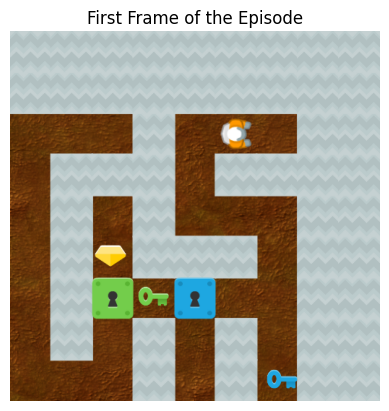

In [63]:
if frames:
    plt.imshow(frames[0])
    plt.title("First Frame of the Episode")
    plt.axis('off')  
    plt.show()
else:
    print("No frames captured.")

World Dimension: 9
Grid Size: 81


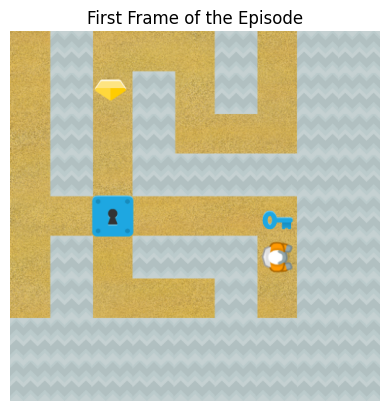

In [100]:
from procgen import ProcgenGym3Env
import struct
import typing
from typing import Tuple, Dict, Callable, List, Optional
from dataclasses import dataclass

DEBUG = (
    False  # slows everything down by ensuring parse & serialize are inverses.
)

# Types and things


@dataclass
class StateValue:
    val: typing.Any
    idx: int

StateValues = typing.Dict[
    str, typing.Any
]  # Union[StateValue, List[StateValue], 'StateValues']]
Square = typing.Tuple[int, int]

def _parse_maze_state_bytes(state_bytes: bytes, assert_=DEBUG) -> StateValues:
    # Functions to read values of different types
    def read_fixed(sb, idx, fmt):
        sz = struct.calcsize(fmt)
        # print(f'{idx} chomp {sz} got {len(sb[idx:(idx+sz)])} fmt {fmt}')
        val = struct.unpack(fmt, sb[idx : (idx + sz)])[0]
        idx += sz
        return val, idx

    read_int = lambda sb, idx: read_fixed(sb, idx, "@i")
    read_float = lambda sb, idx: read_fixed(sb, idx, "@f")

    def read_string(sb, idx):
        sz, idx = read_int(sb, idx)
        val = sb[idx : (idx + sz)].decode("ascii")
        idx += sz
        return val, idx

    # Function to process a value definition and return a value (called recursively for loops)
    def parse_value(vals, val_def, idx):
        typ = val_def[0]
        name = val_def[1]
        # print((typ, name))
        if typ == "int":
            val, idx = read_int(state_bytes, idx)
            vals[name] = StateValue(val, idx)
        elif typ == "float":
            val, idx = read_float(state_bytes, idx)
            vals[name] = StateValue(val, idx)
        elif typ == "string":
            val, idx = read_string(state_bytes, idx)
            vals[name] = StateValue(val, idx)
        elif typ == "loop":
            len_name = val_def[2]
            loop_val_defs = val_def[3]
            loop_len = vals[len_name].val
            vals[name] = []
            for _ in range(loop_len):
                vals_this = {}
                for loop_val_def in loop_val_defs:
                    idx = parse_value(vals_this, loop_val_def, idx)
                vals[name].append(vals_this)
        return idx

    # Dict to hold values
    vals = {}

    # Loop over list of value defs, parsing each
    idx = 0
    for val_def in MAZE_STATE_DICT_TEMPLATE:
        idx = parse_value(vals, val_def, idx)

    if assert_:
        assert (
            _serialize_maze_state(vals, assert_=False) == state_bytes
        ), "serialize(deserialize(state_bytes)) != state_bytes"
    return vals

def _serialize_maze_state(state_vals: StateValues, assert_=DEBUG) -> bytes:
    # Serialize any value to a bytes object
    def serialize_val(val):
        if isinstance(val, StateValue):
            val = val.val
        if isinstance(val, int):
            return struct.pack("@i", val)
        elif isinstance(val, float):
            return struct.pack("@f", val)
        elif isinstance(val, str):
            return serialize_val(len(val)) + val.encode("ascii")
        else:
            raise ValueError(f"type(val)={type(val)} not handled")

    # Flatten the nested values into a single list of primitives
    def flatten_vals(vals, flat_list=[]):
        if isinstance(vals, dict):
            for val in vals.values():
                flatten_vals(val, flat_list)
        elif isinstance(vals, list):
            for val in vals:
                flatten_vals(val, flat_list)
        else:
            flat_list.append(vals)

    # Flatten the values, then serialize
    flat_vals = []
    flatten_vals(state_vals, flat_vals)

    state_bytes = b"".join([serialize_val(val) for val in flat_vals])

    if assert_:
        assert (
            _parse_maze_state_bytes(state_bytes, assert_=False) == state_vals
        ), "deserialize(serialize(state_vals)) != state_vals"
    return state_bytes



def test_state_parsing():
    # env_name = "procgen:procgen-heist-v0" 
    # env = gym.make(env_name, start_level=100, num_levels=200, render_mode="rgb_array", distribution_mode="easy") 
    env = create_venv(num = 5, start_level=0, num_levels=5)

    state_bytes = env.env.callmethod("get_state")[0]
    
    state_values = _parse_maze_state_bytes(state_bytes)
    
    # Access specific state values
    world_dim = state_values["world_dim"].val
    grid_size = state_values["grid_size"].val
    # grid_data = state_values["grid_data"]
    
    print("World Dimension:", world_dim)
    print("Grid Size:", grid_size)
    return state_values, env

state_values, env= test_state_parsing()
data = state_values["data"]
frame = env.render(mode='rgb_array')
observation = env.reset()


if frames:
    
    plt.imshow(frame)
    plt.title("First Frame of the Episode")
    plt.axis('off')  
    plt.show()
else:
    print("No frames captured.")

In [94]:
def get_positions_with_value_2(data):
    positions = []
    for i, cell in enumerate(data):
        if 'i' in cell and cell['i'].val == 51:
            positions.append(i)
    return positions

In [90]:
key_positions = get_positions_with_value_2(state_values)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 23,
 25,
 26,
 28,
 30,
 31,
 32,
 34,
 35,
 43,
 44,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 57,
 61,
 62,
 64,
 66,
 68,
 70,
 71,
 73,
 77,
 79,
 80]

In [91]:
state_values

[{'i': StateValue(val=51, idx=20999)},
 {'i': StateValue(val=51, idx=21003)},
 {'i': StateValue(val=51, idx=21007)},
 {'i': StateValue(val=51, idx=21011)},
 {'i': StateValue(val=51, idx=21015)},
 {'i': StateValue(val=51, idx=21019)},
 {'i': StateValue(val=51, idx=21023)},
 {'i': StateValue(val=51, idx=21027)},
 {'i': StateValue(val=51, idx=21031)},
 {'i': StateValue(val=51, idx=21035)},
 {'i': StateValue(val=51, idx=21039)},
 {'i': StateValue(val=51, idx=21043)},
 {'i': StateValue(val=51, idx=21047)},
 {'i': StateValue(val=51, idx=21051)},
 {'i': StateValue(val=51, idx=21055)},
 {'i': StateValue(val=51, idx=21059)},
 {'i': StateValue(val=51, idx=21063)},
 {'i': StateValue(val=51, idx=21067)},
 {'i': StateValue(val=100, idx=21071)},
 {'i': StateValue(val=51, idx=21075)},
 {'i': StateValue(val=100, idx=21079)},
 {'i': StateValue(val=100, idx=21083)},
 {'i': StateValue(val=100, idx=21087)},
 {'i': StateValue(val=51, idx=21091)},
 {'i': StateValue(val=100, idx=21095)},
 {'i': StateValue(va

In [35]:
env = ProcgenGym3Env(num=1, env_name="heist", num_levels=1, start_level=0)
state_bytes = env.callmethod("get_state")[0]
state_values = _parse_maze_state_bytes(state_bytes)

positions_with_value_2 = get_positions_with_value_2(state_values['data'])


In [19]:
state_values['data']

[{'i': StateValue(val=51, idx=21740)},
 {'i': StateValue(val=51, idx=21744)},
 {'i': StateValue(val=51, idx=21748)},
 {'i': StateValue(val=51, idx=21752)},
 {'i': StateValue(val=51, idx=21756)},
 {'i': StateValue(val=51, idx=21760)},
 {'i': StateValue(val=51, idx=21764)},
 {'i': StateValue(val=51, idx=21768)},
 {'i': StateValue(val=51, idx=21772)},
 {'i': StateValue(val=51, idx=21776)},
 {'i': StateValue(val=51, idx=21780)},
 {'i': StateValue(val=51, idx=21784)},
 {'i': StateValue(val=51, idx=21788)},
 {'i': StateValue(val=51, idx=21792)},
 {'i': StateValue(val=51, idx=21796)},
 {'i': StateValue(val=51, idx=21800)},
 {'i': StateValue(val=51, idx=21804)},
 {'i': StateValue(val=51, idx=21808)},
 {'i': StateValue(val=51, idx=21812)},
 {'i': StateValue(val=51, idx=21816)},
 {'i': StateValue(val=51, idx=21820)},
 {'i': StateValue(val=51, idx=21824)},
 {'i': StateValue(val=51, idx=21828)},
 {'i': StateValue(val=51, idx=21832)},
 {'i': StateValue(val=51, idx=21836)},
 {'i': StateValue(val=51,

In [ ]:
env.obse

In [30]:
model = load_model(env)

AttributeError: 'ProcgenGym3Env' object has no attribute 'observation_space'

In [26]:
for i in state_values["data"]:
    if i["i"].val == 2:
        print("srt")

